In [1]:
import pandas as pd
import altair as alt

In [7]:
# jstor_df = pd.read_csv("../datasets/private_data/combined_journal_data.csv")
dhq_df = pd.read_csv("../datasets/cleaned_dhq_data.csv")

In [9]:
dhq_df.columns

Index(['issue_index_title', 'issue_index_editors',
       'issue_index_article_authors', 'issue_index_article_link',
       'issue_index_article_title', 'issue_index_article_abstract',
       'issue_index_issue_text', 'issue_index_issue_link', 'full_article_text',
       'full_article_abstract', 'full_extracted_text',
       'full_extracted_paragraph', 'full_article_header_lang',
       'full_article_header_title', 'full_article_authors',
       'full_article_notes', 'full_article_works_cited',
       'full_article_pubinfo', 'year_published', 'volume', 'issue', 'month',
       'date_published', 'word_tokenized_text', 'sentence_tokenized_text',
       'word_count', 'sentence_count', 'string_length',
       'lower_full_extracted_text'],
      dtype='object')

In [16]:
dhq_df['tool_count'] = dhq_df.lower_full_extracted_text.str.count('tool')
dhq_df['article_length'] = dhq_df.lower_full_extracted_text.str.len()

In [20]:
grouped_dhq = dhq_df.groupby('date_published', as_index=False).agg({'tool_count': 'sum', 'article_length': 'sum'})
grouped_dhq['tool_count_per_article'] = grouped_dhq.tool_count / grouped_dhq.article_length * 100

<Axes: xlabel='date_published'>

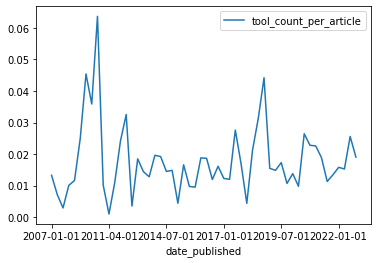

In [25]:
grouped_dhq.plot(x='date_published', y='tool_count_per_article')

In [29]:
dhq_df.sort_values(by='tool_count', ascending=False).head(5)

,issue_index_title,issue_index_editors,issue_index_article_authors,issue_index_article_link,issue_index_article_title,issue_index_article_abstract,issue_index_issue_text,issue_index_issue_link,full_article_text,full_article_abstract,...,month,date_published,word_tokenized_text,sentence_tokenized_text,word_count,sentence_count,string_length,lower_full_extracted_text,tool_count,article_length
3996,Special Cluster: e-Science for the Arts and Hu...,Editors: Stuart Dunn and Tobias Blanke,"Ray Siemens, University of Victoria; Cara Leit...",http://www.digitalhumanities.org/dhq/vol/3/4/0...,\n âIt May Change My Understan...,Abstract\n [en]\n As...,2009: 3.4,http://www.digitalhumanities.org/dhq/vol/3/4/i...,"[[<div class=""div div0"">\n<h1 class=""head"">Int...",Abstract\nAs the amount of scholarly material ...,...,October,2009-10-01,"['Results', '15We', 'have', 'organized', 'the'...",['Results\n15We have organized the results of ...,5859,181,34627,results\n15we have organized the results of th...,86.0,34627.0
880,AudioVisual Data in DH,"Editors: Taylor Arnold, Jasmijn van Gorp, Stef...","Eric Kaltman, Department of Computer Science, ...",http://www.digitalhumanities.org/dhq/vol/15/1/...,From the Presupposition of Doom to the Manifes...,Abstract\n [en]\n \n...,2021: 15.1,http://www.digitalhumanities.org/dhq/vol/15/1/...,"[[<div class=""div div0"">\n<h1 class=""head"">1 T...",Abstract\nFor the field of game history to mat...,...,January,2021-01-01,"['1', 'The', 'Changing', 'Archive', '1As', 'ma...",['1 The Changing Archive\n1As many institution...,19393,651,136644,1 the changing archive\n1as many institutions ...,82.0,136644.0
3578,Futures of Digital Studies: 2,Editors: Mauro Carassai and Elise Takehana,"Fred Gibbs, George Mason University; Trevor Ow...",http://www.digitalhumanities.org/dhq/vol/6/2/0...,Building Better Digital Humanities Tools: Towa...,Abstract\n [en]\n ...,2012: 6.2,http://www.digitalhumanities.org/dhq/vol/6/2/i...,"[[<div class=""div div0"">\n<h1 class=""head"">Int...",Abstract\nDespite significant investments in t...,...,April,2012-04-01,"['Panel', 'discussion', '14', 'To', 'explore',...","[""Panel discussion\n14 To explore\xa0more deep...",2761,80,19094,panel discussion\n14 to explore more deeply sc...,75.0,19094.0
3876,Articles,NaN,"Patrik Svensson, HUMlab, UmeÃ¥ University",http://www.digitalhumanities.org/dhq/vol/4/1/0...,The Landscape of Digital Humanities,Abstract\n [en]\n Th...,2010: 4.1,http://www.digitalhumanities.org/dhq/vol/4/1/i...,"[[<div class=""div div0"">\n<h1 class=""head"">Int...",Abstract\nThe digital humanities is increasing...,...,January,2010-01-01,"['Part', 'III', ':', 'Modes', 'of', 'Engagemen...",['Part III: Modes of Engagement\n\nIntroductio...,11104,355,79252,part iii: modes of engagement\n\nintroduction\...,72.0,79252.0
3692,Articles,NaN,"Ray Siemens, University of Victoria; Meagan Ti...",http://www.digitalhumanities.org/dhq/vol/6/1/0...,Pertinent Discussions Toward Modeling the Soci...,Abstract\n [en]\n \n...,2012: 6.1,http://www.digitalhumanities.org/dhq/vol/6/1/i...,"[[<div class=""div div0"">\n<h1 class=""head"">1. ...",Abstract\nThe two annotated bibliographies pre...,...,January,2012-01-01,"['2', '.', 'Reading', 'Devices', ',', 'Tools',...","['2.', 'Reading Devices, Tools, and Social Med...",15727,746,123067,"2. reading devices, tools, and social media is...",55.0,123067.0


In [22]:
alt.Chart(grouped_dhq).mark_bar().encode(
    x='tool_count:Q',
    y='date_published:T'
)

alt.Chart(...)

In [11]:
dhq_df[dhq_df.lower_full_extracted_text.str.contains('tool', na=False)].sort_values(by='date_published')

,issue_index_title,issue_index_editors,issue_index_article_authors,issue_index_article_link,issue_index_article_title,issue_index_article_abstract,issue_index_issue_text,issue_index_issue_link,full_article_text,full_article_abstract,...,volume,issue,month,date_published,word_tokenized_text,sentence_tokenized_text,word_count,sentence_count,string_length,lower_full_extracted_text
4474,Editorials,NaN,"Johanna Drucker, University of Virginia",http://www.digitalhumanities.org/dhq/vol/1/1/0...,Philosophy and Digital Humanities: A review of...,Abstract\n [en]\n A ...,2007: 1.1,http://www.digitalhumanities.org/dhq/vol/1/1/i...,"[[<div class=""ptext"" id=""p1"">Humanities comput...",Abstract\nA review of Willard McCarty's Humani...,...,1,1,January,2007-01-01,"['But', 'the', 'shape', 'of', 'knowledge', 'as...",['But the shape of knowledge as we will know i...,203,6,1202,but the shape of knowledge as we will know it ...
4416,Editorials,NaN,"Julia Flanders, Brown University; Wendell Piez...",http://www.digitalhumanities.org/dhq/vol/1/1/0...,Welcome to Digital Humanities Quarterly,Abstract\n [en]\n A ...,2007: 1.1,http://www.digitalhumanities.org/dhq/vol/1/1/i...,"[[<div class=""ptext"" id=""p1"">Welcome to the fi...","Abstract\nA welcome to DHQ from the editors, w...",...,1,1,January,2007-01-01,"['What', 'is', 'experimental', 'about', 'DHQ',...","['What is experimental about DHQ?', 'First, it...",372,13,2198,"what is experimental about dhq? first, it is a..."
4423,Editorials,NaN,"Jeff Howard, University of Texas, Austin",http://www.digitalhumanities.org/dhq/vol/1/1/0...,Interpretative Quests in Theory and Pedagogy,Abstract\n [en]\n In...,2007: 1.1,http://www.digitalhumanities.org/dhq/vol/1/1/i...,"[[<div class=""div div0"">\n<h1 class=""head"">Que...","Abstract\nIn this paper, I extend theoretical ...",...,1,1,January,2007-01-01,"['The', 'Pedagogical', 'Implications', 'of', '...",['The Pedagogical Implications of Interpretati...,1606,39,10778,the pedagogical implications of interpretative...
4424,Editorials,NaN,"Jeff Howard, University of Texas, Austin",http://www.digitalhumanities.org/dhq/vol/1/1/0...,Interpretative Quests in Theory and Pedagogy,Abstract\n [en]\n In...,2007: 1.1,http://www.digitalhumanities.org/dhq/vol/1/1/i...,"[[<div class=""div div0"">\n<h1 class=""head"">Que...","Abstract\nIn this paper, I extend theoretical ...",...,1,1,January,2007-01-01,"['Prototypes', '26Based', 'on', 'their', 'desi...",['Prototypes\n26Based on their design document...,1996,59,13019,"prototypes\n26based on their design documents,..."
4426,Editorials,NaN,"Drew VandeCreek, Northern Illinois University ...",http://www.digitalhumanities.org/dhq/vol/1/1/0...,\n âWebs of Significanceâ: T...,Abstract\n [en]\n Li...,2007: 1.1,http://www.digitalhumanities.org/dhq/vol/1/1/i...,"[[<div class=""div div0"">\n<h1 class=""head"">I</...",Abstract\nLincoln/Net (http://lincoln.lib.niu....,...,1,1,January,2007-01-01,"['I', '1Lincoln/Net', '(', 'http', ':', '//lin...",['I\n1Lincoln/Net (http://lincoln.lib.niu.edu)...,1461,44,10077,"i\n1lincoln/net (http://lincoln.lib.niu.edu), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Articles,NaN,"AdÃ¡n Israel Lerma Mayer, Universidad AnÃ¡huac...",http://www.digitalhumanities.org/dhq/vol/16/4/...,Underlying\n\t\t\t\t\tSentiments in 1867: A St...,Abstract\n [en]\n\t\t\t\t\n\t\t...,2022: 16.4,http://www.digitalhumanities.org/dhq/vol/16/4/...,"[[<div class=""div div0"">\n<h1 class=""head"">Int...",Abstract\nThis article focuses on the internat...,...,16,4,October,2022-10-01,"['Appendix', '761-', 'Examples', 'of', 'variou...",['Appendix \n761- Examples of various entities...,3803,172,22021,appendix \n761- examples of various entities o...
44,Articles,NaN,"Amanda Furiasse, Nova Southeastern University",http://www.digitalhumanities.org/dhq/vol/16/4/...,The Banality\n\t\t\t\t\tof Big Data: A Review ...,Abstract\n [en]\n\t\t\t\t\n\t\t...,2022: 16.4,http://www.digitalhumanities.org/d